In [31]:
import pandas  as pd
import math
import numpy as np
import json
import statistics
from scipy import stats
import matplotlib as matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
with open('models_acc_ClusterCentroids.txt') as f:
    cluster_centroids = json.load(f)

with open('models_acc_RandomUnderSampler.txt') as f:
    random_undersampler = json.load(f)
    
with open('models_acc_SMOTE.txt') as f:
    smote = json.load(f)
    
smote

{'KNeighborsClassifier': [0.9996394843747252,
  0.9997450011430983,
  0.9997274150150361,
  0.9997010358229429,
  0.9996482774387563,
  0.9996482774387563,
  0.9996834496948807,
  0.9996658635668185,
  0.9996570705027874,
  0.9996658635668185,
  0.9996746566308495,
  0.9996394843747252,
  0.9996922427589118,
  0.999718621951005,
  0.9996570705027874,
  0.9997801733992226,
  0.9997010358229429,
  0.9996043121186009,
  0.9996131051826319,
  0.9997098288869739,
  0.9996306913106942,
  0.9996394843747252,
  0.9996922427589118,
  0.9997450011430983,
  0.9996658635668185,
  0.9997010358229429,
  0.9995955190545698,
  0.9997537942071294,
  0.9997098288869739,
  0.9996922427589118,
  0.9996482774387563,
  0.999621898246663,
  0.9996922427589118,
  0.9996131051826319,
  0.999718621951005,
  0.9996043121186009,
  0.9996394843747252,
  0.9997625872711605,
  0.9997362080790673,
  0.999621898246663,
  0.9996746566308495,
  0.9996306913106942,
  0.9997889664632538,
  0.9997450011430983,
  0.99953396

In [45]:
df_randu=pd.DataFrame.from_dict(random_undersampler,orient='index').transpose()
df_cluster=pd.DataFrame.from_dict(cluster_centroids,orient='index').transpose()
df_smote =pd.DataFrame.from_dict(smote,orient='index').transpose()

df = df_randu[['LinearSVC']].copy()
df['MLP-Cluster'] = df_cluster['LinearSVC'].to_numpy()
df['MLP-SMOTE'] = df_smote['LinearSVC'].to_numpy()

df.columns = ['Random UnderSampling', 'Cluster Centroids', "SMOTE"]

In [46]:
df

,Random UnderSampling,Cluster Centroids,SMOTE
0,0.939086,0.903553,0.944920
1,0.959391,0.923858,0.943417
2,0.964467,0.954315,0.944437
3,0.944162,0.949239,0.945263
4,0.928571,0.908163,0.943592
5,0.923858,0.928934,0.943364
6,0.949239,0.944162,0.945114
7,0.944162,0.923858,0.943610
8,0.964467,0.939086,0.944164
9,0.943878,0.923469,0.944542


## Histogramas

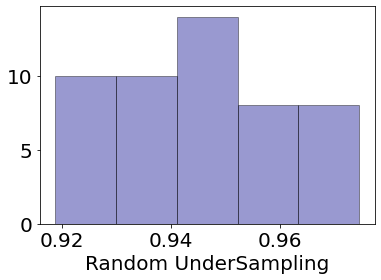

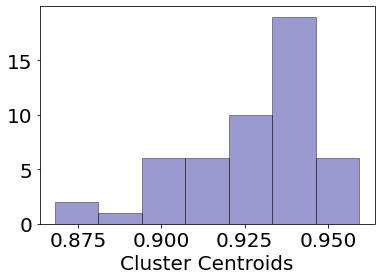

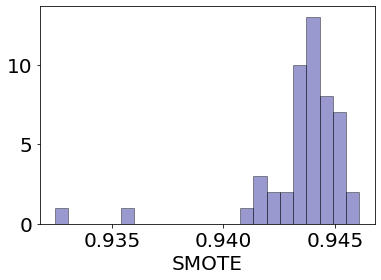

In [47]:
for col in list(df):
    sns.distplot(df[col], hist=True, kde=False, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.show()

## KS-TEST

In [48]:
for col in list(df):
    print(col)
    print(stats.kstest(df[col], 'norm'))
    print('-------')

Random UnderSampling
KstestResult(statistic=0.8208951236736879, pvalue=1.6716837905816046e-37)
-------
Cluster Centroids
KstestResult(statistic=0.8073083913904682, pvalue=8.178368387721153e-36)
-------
SMOTE
KstestResult(statistic=0.8244484269052533, pvalue=5.806527215301984e-38)
-------


## Wilcoxon Signed-Rank Test 

In [49]:
import itertools

combinations = list(itertools.combinations(list(df), 2))

for pair in combinations:
    print(pair)
    print(stats.wilcoxon(df[pair[0]], df[pair[1]]))
    print('-------')

('Random UnderSampling', 'Cluster Centroids')
WilcoxonResult(statistic=64.0, pvalue=7.55987365042387e-08)
-------
('Random UnderSampling', 'SMOTE')
WilcoxonResult(statistic=594.0, pvalue=0.6745456337061272)
-------
('Cluster Centroids', 'SMOTE')
WilcoxonResult(statistic=121.0, pvalue=6.166815818239549e-07)
-------


In [50]:
from collections import defaultdict
rankins = defaultdict(list)

def soma_x(valor, diff):
    if diff != 0:
        return valor + soma_x(valor-1, diff-1)
    return 0


for i, row in df.iterrows():
    tuple_ = [('Random UnderSampling', row['Random UnderSampling']), ('SMOTE', row['SMOTE']), ('Cluster Centroids', row['Cluster Centroids'])]
    sort = sorted(tuple_, key=lambda tup: tup[1], reverse=True)  
    the_last = -1
    for index, valor in enumerate(sort):
        if(index!= 2 and (sort[index+1][1] == sort[index][1])):
            if(the_last == -1):
                the_last = index
        elif (the_last != -1):
            diff = index - the_last + 1
            soma = soma_x(index+1, diff)

            rank = soma/diff        
            for j in range(diff): 
                rankins[sort[the_last][0]].append(rank)
                the_last = the_last + 1
            the_last = -1
        else:
            rankins[sort[index][0]].append(index+1)
    
print(rankins)

defaultdict(<class 'list'>, {'SMOTE': [1, 2, 3, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 3], 'Random UnderSampling': [2, 1, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 2, 2.5, 2, 1, 1, 1, 2, 2, 1, 1, 1.5, 2, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1], 'Cluster Centroids': [3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2.5, 3, 3, 3, 3, 3, 3, 3, 3, 1.5, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2]})


In [51]:
names_list = []
avrangs_list = []
for key, value in rankins.items():
    names_list.append(key)
    avrangs_list.append(statistics.mean(value))
    print(key ,statistics.mean(value))
       

SMOTE 1.62
Random UnderSampling 1.68
Cluster Centroids 2.7


In [52]:
matplotlib.rcParams.update({'font.size': 20})
def graph_ranks(avranks, names, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    tempsort = sorted([(a, i) for i, a in enumerate(sums)], reverse=reverse)
    ssums = nth(tempsort, 0)
    sortidx = nth(tempsort, 1)
    nnames = [names[x] for x in sortidx]

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    if cd and cdmethod is None:
        # get pairs of non significant methods

        def get_lines(sums, hsd):
            # get all pairs
            lsums = len(sums)
            allpairs = [(i, j) for i, j in mxrange([[lsums], [lsums]]) if j > i]
            # remove not significant
            notSig = [(i, j) for i, j in allpairs
                      if abs(sums[i] - sums[j]) <= hsd]
            # keep only longest

            def no_longer(ij_tuple, notSig):
                i, j = ij_tuple
                for i1, j1 in notSig:
                    if (i1 <= i and j1 > j) or (i1 < i and j1 >= j):
                        return False
                return True

            longest = [(i, j) for i, j in notSig if no_longer((i, j), notSig)]

            return longest

        lines = get_lines(ssums, cd)
        linesblank = 0.2 + 0.2 + (len(lines) - 1) * 0.1

        # add scale
        distanceh = 0.25
        cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width*2, height*2))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]


    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom")

    k = len(ssums)

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=0.7)
        text(textspace - 0.13, chei, nnames[i], ha="right", va="center")

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=0.7)
        text(textspace + scalewidth + 0.13, chei, nnames[i],
             ha="left", va="center")

    if cd and cdmethod is None:
        # upper scale
        if not reverse:
            begin, end = rankpos(lowv), rankpos(lowv + cd)
        else:
            begin, end = rankpos(highv), rankpos(highv - cd)

        line([(begin, distanceh), (end, distanceh)], linewidth=0.7)
        line([(begin, distanceh + bigtick / 2),
              (begin, distanceh - bigtick / 2)],
             linewidth=0.7)
        line([(end, distanceh + bigtick / 2),
              (end, distanceh - bigtick / 2)],
             linewidth=0.7)
        text((begin + end) / 2, distanceh - 0.05, "DC = " +"{0:.4f}".format(cd),
             ha="center", va="bottom")

        # no-significance lines
        def draw_lines(lines, side=0.05, height=0.1):
            start = cline + 0.2
            for l, r in lines:
                line([(rankpos(ssums[l]) - side, start),
                      (rankpos(ssums[r]) + side, start)],
                     linewidth=2.5)
                start += height

        draw_lines(lines)

    elif cd:
        begin = rankpos(avranks[cdmethod] - cd)
        end = rankpos(avranks[cdmethod] + cd)
        line([(begin, cline), (end, cline)],
             linewidth=2.5)
        line([(begin, cline + bigtick / 2),
              (begin, cline - bigtick / 2)],
             linewidth=2.5)
        line([(end, cline + bigtick / 2),
              (end, cline - bigtick / 2)],
             linewidth=2.5)

    if filename:
        print_figure(fig, filename, **kwargs)

def compute_CD(avranks, n, alpha="0.05", test="nemenyi"):
    """
    Returns critical difference for Nemenyi or Bonferroni-Dunn test
    according to given alpha (either alpha="0.05" or alpha="0.1") for average
    ranks and number of tested datasets N. Test can be either "nemenyi" for
    for Nemenyi two tailed test or "bonferroni-dunn" for Bonferroni-Dunn test.
    """
    k = len(avranks)
    d = {("nemenyi", "0.05"): [0, 0, 1.959964, 2.343701, 2.569032, 2.727774,
                               2.849705, 2.94832, 3.030879, 3.101730, 3.163684,
                               3.218654, 3.268004, 3.312739, 3.353618, 3.39123,
                               3.426041, 3.458425, 3.488685, 3.517073,
                               3.543799,3.569040],
         ("nemenyi", "0.1"): [0, 0, 1.644854, 2.052293, 2.291341, 2.459516,
                              2.588521, 2.692732, 2.779884, 2.854606, 2.919889,
                              2.977768, 3.029694, 3.076733, 3.119693, 3.159199,
                              3.195743, 3.229723, 3.261461, 3.291224, 3.319233],
         ("bonferroni-dunn", "0.05"): [0, 0, 1.960, 2.241, 2.394, 2.498, 2.576,
                                       2.638, 2.690, 2.724, 2.773],
         ("bonferroni-dunn", "0.1"): [0, 0, 1.645, 1.960, 2.128, 2.241, 2.326,
                                      2.394, 2.450, 2.498, 2.539]}
    q = d[(test, alpha)]
    print(k, q)
    cd = q[k] * (k * (k + 1) / (6.0 * n)) ** 0.5
    return cd

In [53]:
def generate_cdd(names, avranks, widthx):
    cd = compute_CD(avranks, 10, test="nemenyi") #tested on 30 datasets
    graph_ranks(avranks, names, cd=cd, width=widthx, textspace=1.5,reverse=True,filename="saida.png")
    plt.show()

3 [0, 0, 1.959964, 2.343701, 2.569032, 2.727774, 2.849705, 2.94832, 3.030879, 3.10173, 3.163684, 3.218654, 3.268004, 3.312739, 3.353618, 3.39123, 3.426041, 3.458425, 3.488685, 3.517073, 3.543799, 3.56904]


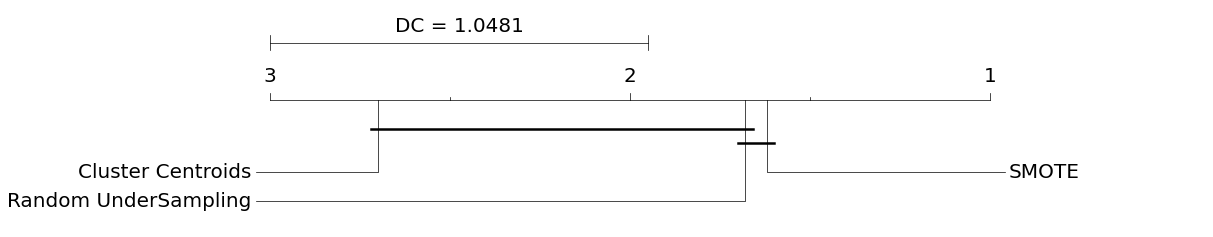

In [54]:
generate_cdd(names_list,avrangs_list,8)

In [55]:
from scipy import stats
print(stats.friedmanchisquare(df['Random UnderSampling'], df['SMOTE'], df['Cluster Centroids']))

FriedmanchisquareResult(statistic=37.21212121212125, pvalue=8.30788638781277e-09)
